# _**Create the grid for WHETGEO 1D Richards coupled with shallow water**_
    -Author: Niccolò Tubini and Riccardo Rigon
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----
This code allows to create a mesh for 1D PDE problem:
    - domain discretization
    - setting parameters
    - setting initial condition
    
All output data are stored in a NetCDF file.
This file is one of the input file of your simulation.


In [ ]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from WHETGEO1D_GridCreator import*
from WHETGEO1D_toNetCDF import*
import warnings
warnings.filterwarnings('ignore')

####### Plot settings #######
nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.3,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}
plt.rcParams.update(nice_fonts)
project_path = os.path.dirname(os.getcwd())


## Define input:
**grid_input_file_name**: name of the grid input file (.csv) with the local file path 
   
> `/data/Grid_input/name.csv`

**ic_input_file_name**: name of the initial condition input file (.csv) with the local file path 
> `/data/Grid_input/name.csv`

**parameter_input_file_name**: name of the parameter input file (.csv) with the local file path 
>`/data/Grid_input/name.csv`

**dictionary_input_file_name**: name of the file (.csv) containing the dictionary for parameters name 
>`/data/Grid_input/name.csv`

**grid_type**: string defining how to discretize the 1D domain. You can choose among:
> `classical`

> `exponential`

> `mixed` 


**dz_min**: thickness of the first layer (for `exponential` and `mixed`)

**dz_max**: larger thickness of the grid (for `mixed`)

**b**: growth rate (for `exponential` and `mixed`)

**psi_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for water suction 
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

**T_interp_model**: string defining the type of the 1D interpolation function used to define the initial condition for temperature
>https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d 

**water_ponding_0**: double [m] defining the water suction at soil surface. If it is larger than $0$ means that there is water ponding.

**T_water_ponding_0**: double [K] defining the temperature at soil surface. 
<br />
<br />

**output_file_name**: name of the output file (.nc) with the local file path
>`/data/Grid_NetCDF/name.nc`

**output_title**: string containing a title for the output, it is saved within the file

**output_summary**: string containing a description for the output, it is saved within the file (global metadata)

**output_date**: string containing the date of file creation, optionally

**output_institution**: string containing the name of whom created the file, optionally



In [9]:

grid_input_file_name = project_path + "/data/Grid_input/grid_Richards_coupled.csv"

ic_input_file_name = project_path + "/data/Grid_input/_ic_richards.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = 0.005

dz_max = 0.1

b = 0.1

psi_interp_model = "linear"

T_interp_model = "linear"

water_ponding_0 = -0.5

T_water_ponding_0 = 273.15




output_file_name =  project_path + "/data/Grid_NetCDF/Grid_Richards.nc"

output_title = '''Computational grid to solve the Richards' equation with the surface boundary condition defined coupling with 
                    the shallow water.
                  '''
output_summary = '''

Type,eta,K,equationStateID,parameterID
L,0,50,1,1
L,-1,50,1,2
L,-2,50,1,3
L,-3,nan,nan,nan

eta,Psi0,T0
-0.0,-3.0,273.15
-3.0,0.0,273.15

water_ponding_0 = -3.0

T_water_ponding_0 = 273.15

'''

output_date = ''

output_institution = 'GEOframe'



## Run

In [10]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=True)

[psi_0, T_0] = set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, water_ponding_0=water_ponding_0, T_water_ponding_0=T_water_ponding_0, shallow_water=True)

control_volume_index = calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                  theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                  output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta      K  equationStateID  parameterID
0    L    0  150.0              1.0          1.0
1    L   -1   50.0              1.0          2.0
2    L   -2   10.0              1.0          3.0
3    L   -3    NaN              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0  -3.0  273.15
1 -3.0   0.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5                   0.0                  0.0   
1     0.41   0.057  2.28   12.4                   0.0                  0.0   
2     0.41   0.065  1.89    7.5                   0.0                  0.0   
3     0.45   0.067  1.41    2.0                   0.0                  0.0   
4     0.43   0.078  1.56    3.6                   0.0                  0.0   
5     0.39   0.100  1.48    5.9                   0.0                  0.0   
6     0.43   0.089  1.23    1.0                   0.0                  0.0   
7     0.41   0.095  1.31    1.9                 

## Show grid

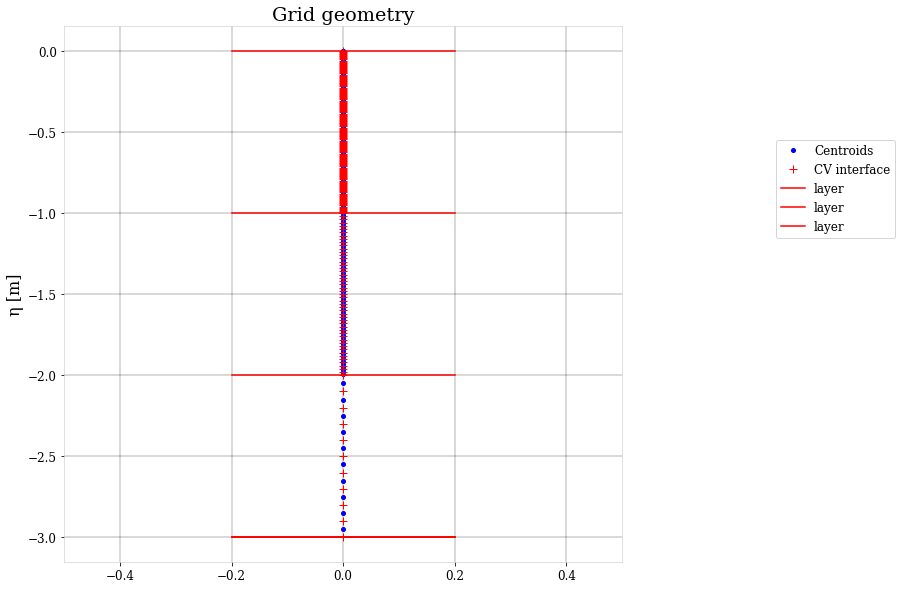

In [11]:
showMesh(data_grid)